# Unsupervised Learning: Trade & Ahead

## Problem Statement

### Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.


### Objective

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

### Data Dictionary

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Company: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

## Importing necessary libraries and data

In [1]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
# !pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 yellowbrick==1.5 -q --user

In [2]:
# Installing the libraries with the specified version.
# uncomment and run the following lines if Jupyter Notebook is being used
# !pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.2 yellowbrick==1.5 -q --user
# !pip install --upgrade -q jinja2

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [3]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to perform PCA
from sklearn.decomposition import PCA

# to compute distances
from scipy.spatial.distance import cdist
from scipy.spatial.distance import pdist



# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to suppress warnings
import warnings

warnings.filterwarnings("ignore")

In [4]:
data = pd.read_csv('/content/stock_data.csv') #Loading our Dataset

## Data Overview

A Data Overview is a summary of a dataset that provides key information about its structure and content. It typically includes the number of rows and columns, data types, presence of missing values, and basic statistical insights such as averages, ranges, and distributions. This overview helps in understanding the dataset's characteristics and guides further analysis or decision-making.

In [5]:
data.shape

(340, 15)

The data has 340 rows and 15 columns

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

7 float variables, 4 integers and 4 object

In [6]:
data.head()

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,AAL,American Airlines Group,Industrials,Airlines,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219
1,ABBV,AbbVie,Health Care,Pharmaceuticals,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171
3,ADBE,Adobe Systems Inc,Information Technology,Application Software,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651
4,ADI,"Analog Devices, Inc.",Information Technology,Semiconductors,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810


The table shows a mix of company growth, risks, and financial health across various industries. Health Care companies like AbbVie and Abbott Laboratories appear stable, with reasonable valuations and good profitability. On the other hand, American Airlines seems to be facing financial struggles, even though its stock price has gone up. Adobe and Analog Devices are expected to grow, but their high stock prices could make them risky investments.

In [7]:
# copying the data to another variable to avoid any changes to original data
df = data.copy()

We make a copy of the dataset using df = data.copy() to avoid making unintended changes to the original data. This is important because:

**Data Integrity:**  Any modifications (e.g., cleaning, transforming, or analyzing) will be done on the copied dataset (df) without altering the original dataset (data). This ensures the original data remains intact for future use or verification.

**Experimentation:** When experimenting with different processing steps (e.g., removing missing values, encoding, normalizing), it's safer to work on a copy so you can revert back if needed without losing the original data.

**Prevent Unintended Side Effects:** If we manipulate the dataset directly, it could cause issues later in the workflow, especially if the original dataset is needed for other tasks or comparisons.

By copying the data, we protect the source dataset while giving us flexibility to make changes.

In [9]:
df.duplicated().sum()

0

we have zero duplicated values

In [10]:
df.isna().sum()

,0
Ticker Symbol,0
Security,0
GICS Sector,0
GICS Sub Industry,0
Current Price,0
Price Change,0
Volatility,0
ROE,0
Cash Ratio,0
Net Cash Flow,0


we have zero missing values

In [11]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Ticker Symbol,340,340,AAL,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Security,340,340,American Airlines Group,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS Sector,340,11,Industrials,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS Sub Industry,340,104,Oil & Gas Exploration & Production,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Current Price,340.0,NaN,NaN,NaN,80.862345,98.055086,4.5,38.555,59.705,92.880001,1274.949951
Price Change,340.0,NaN,NaN,NaN,4.078194,12.006338,-47.129693,-0.939484,4.819505,10.695493,55.051683
Volatility,340.0,NaN,NaN,NaN,1.525976,0.591798,0.733163,1.134878,1.385593,1.695549,4.580042
ROE,340.0,NaN,NaN,NaN,39.597059,96.547538,1.0,9.75,15.0,27.0,917.0
Cash Ratio,340.0,NaN,NaN,NaN,70.023529,90.421331,0.0,18.0,47.0,99.0,958.0
Net Cash Flow,340.0,NaN,NaN,NaN,55537620.588235,1946365312.175789,-11208000000.0,-193906500.0,2098000.0,169810750.0,20764000000.0


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
Exploratory Data Analysis (EDA) is the process of analyzing and visualizing data to better understand its patterns, relationships, and structure. It helps identify trends, detect outliers, and uncover insights, while also addressing issues like missing values or anomalies. EDA is an essential step in preparing the data for further analysis or modeling.

In [13]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(df, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=df, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        df[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        df[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

This function creates a combined plot with a boxplot on top and a histogram below, allowing you to:

Visually inspect the distribution of the data (via the histogram).
Identify summary statistics such as the mean and median values.
Spot outliers (using the boxplot).
Compare the shape of the distribution (using both the histogram and optional KDE curve).
By combining these two plots, you get both a quantitative summary (boxplot) and a distribution view (histogram) of the feature, which can help in better understanding the data.

In [15]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

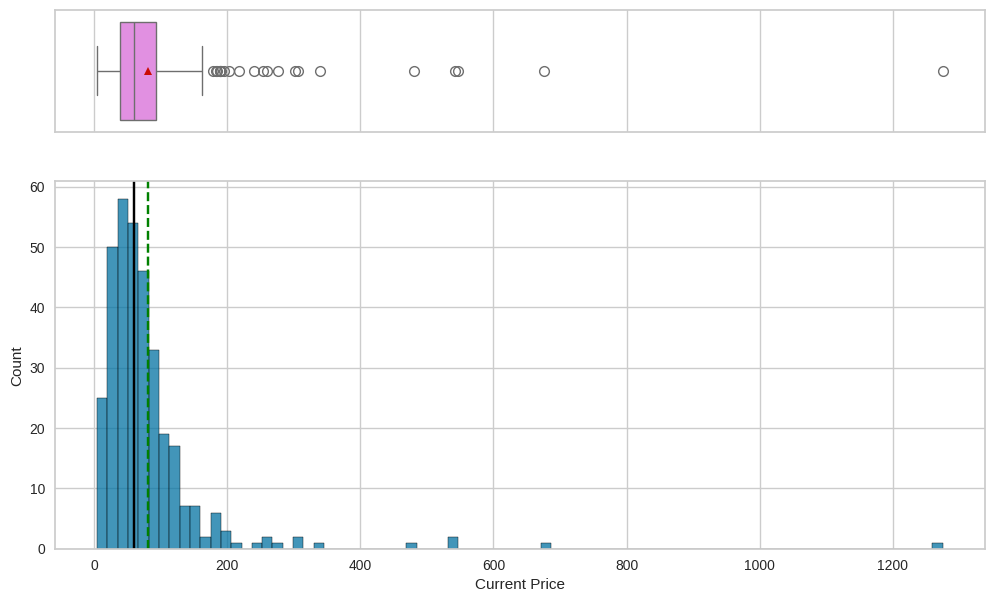

In [16]:
histogram_boxplot(df, 'Current Price')

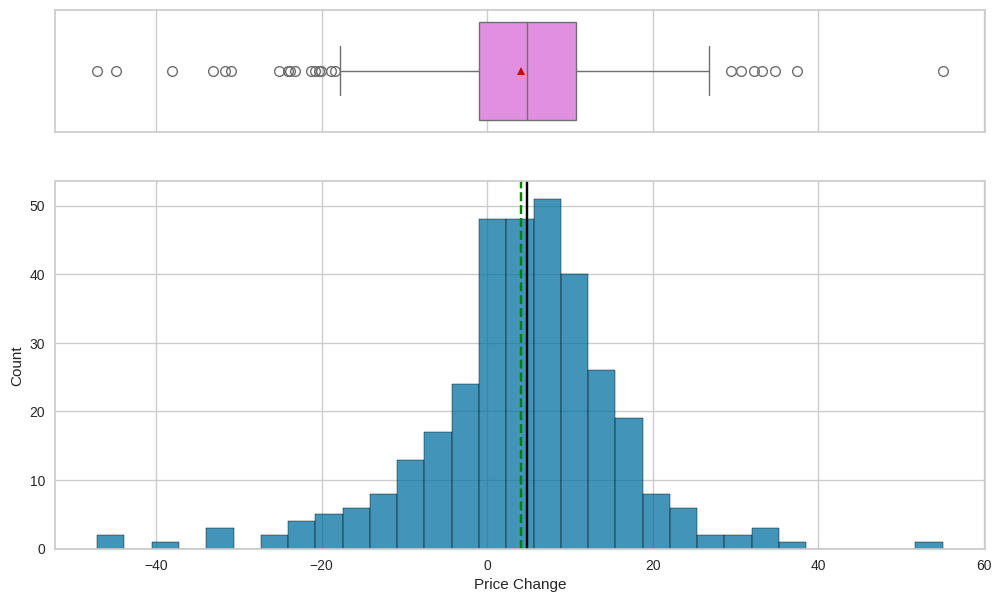

In [17]:
histogram_boxplot(df, 'Price Change')

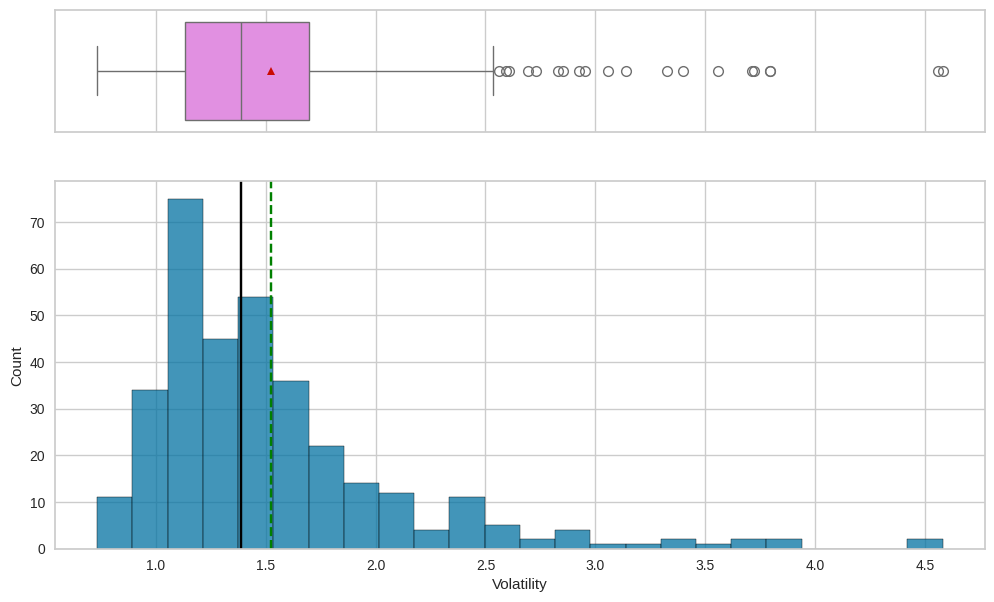

In [18]:
histogram_boxplot(df, 'Volatility')

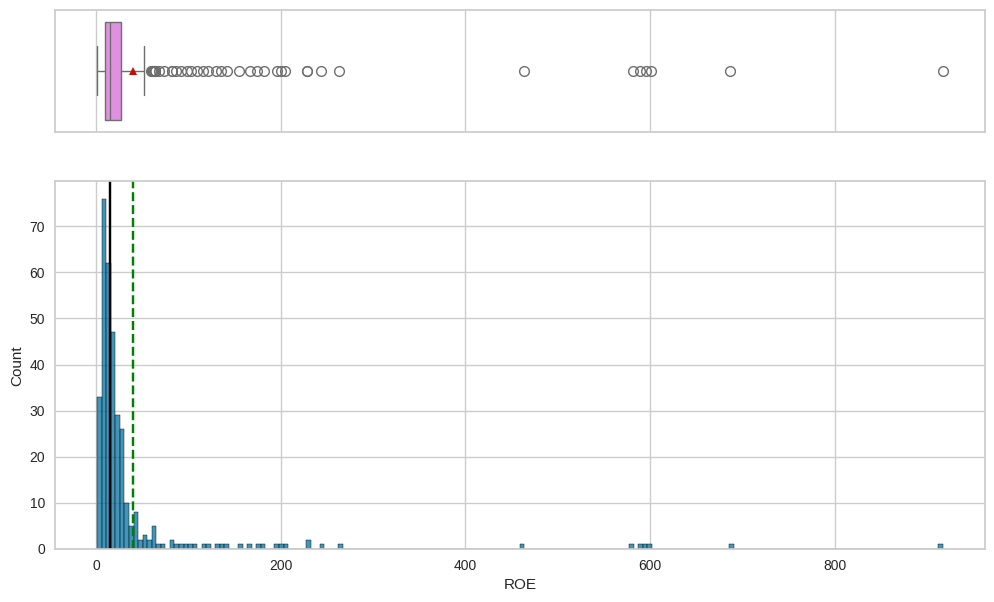

In [19]:
histogram_boxplot(df, 'ROE')

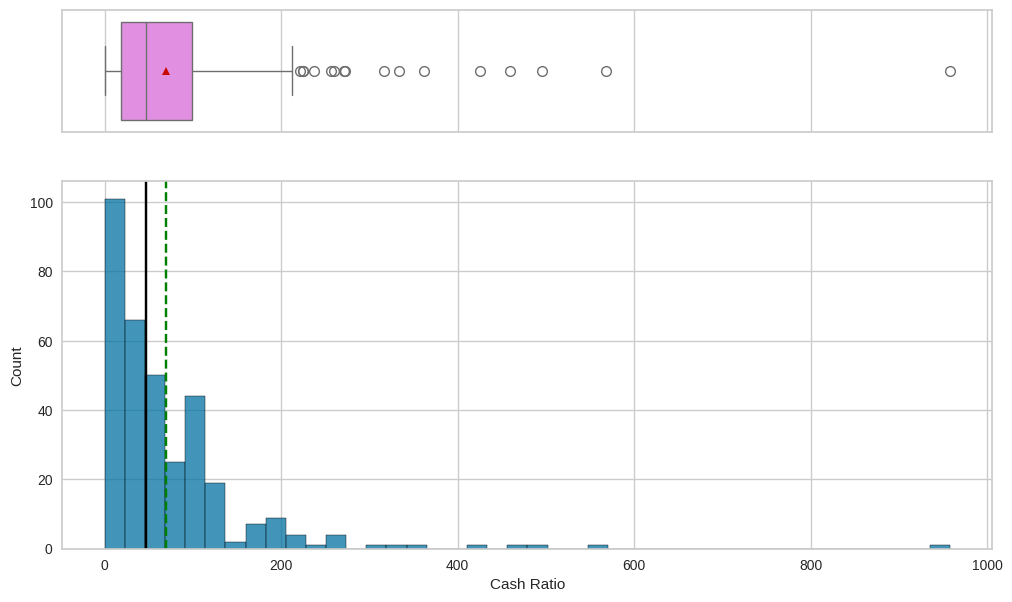

In [20]:
histogram_boxplot(df, 'Cash Ratio')

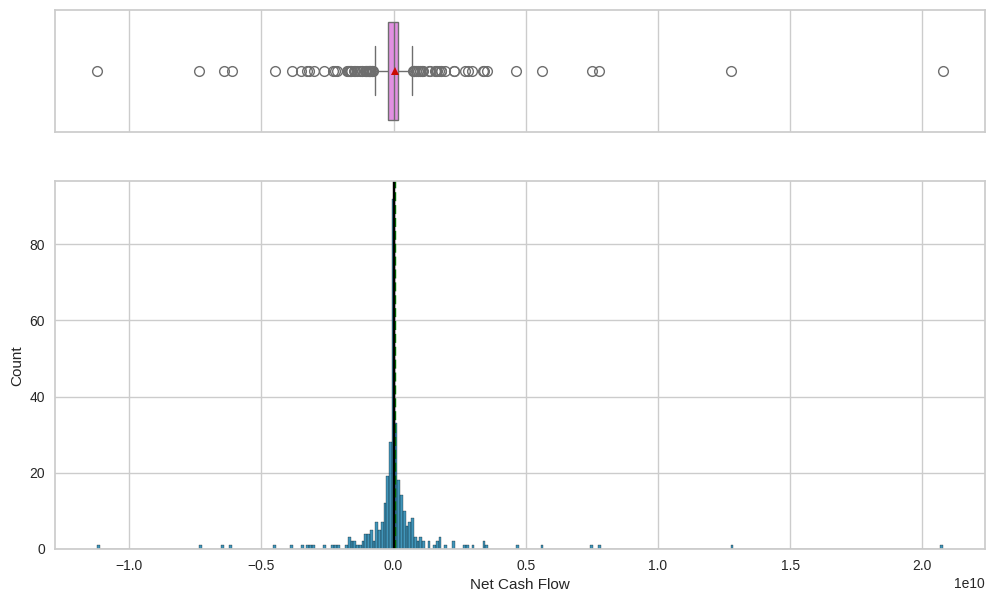

In [21]:
histogram_boxplot(df, 'Net Cash Flow')

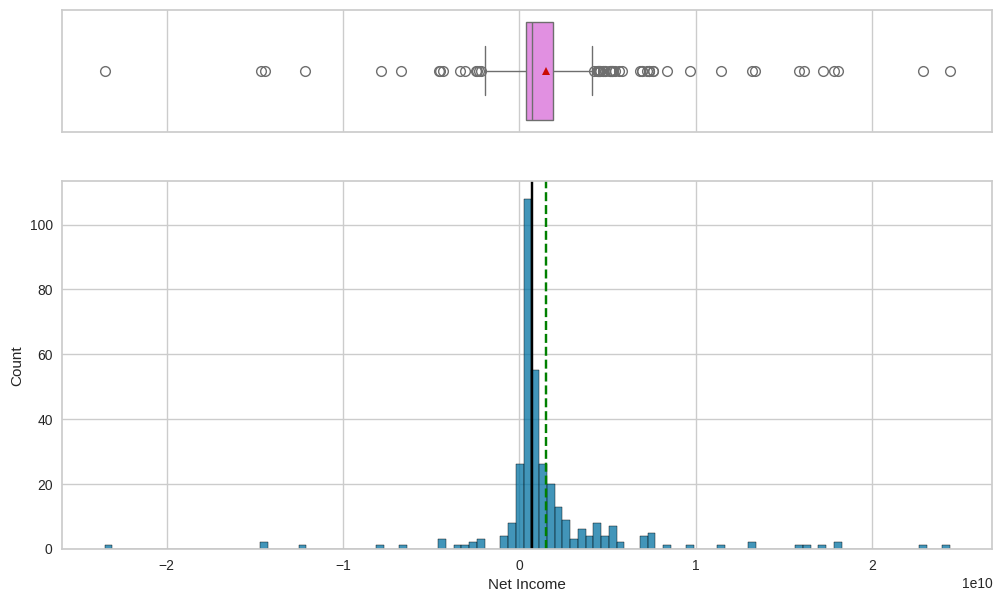

In [22]:
histogram_boxplot(df, 'Net Income')

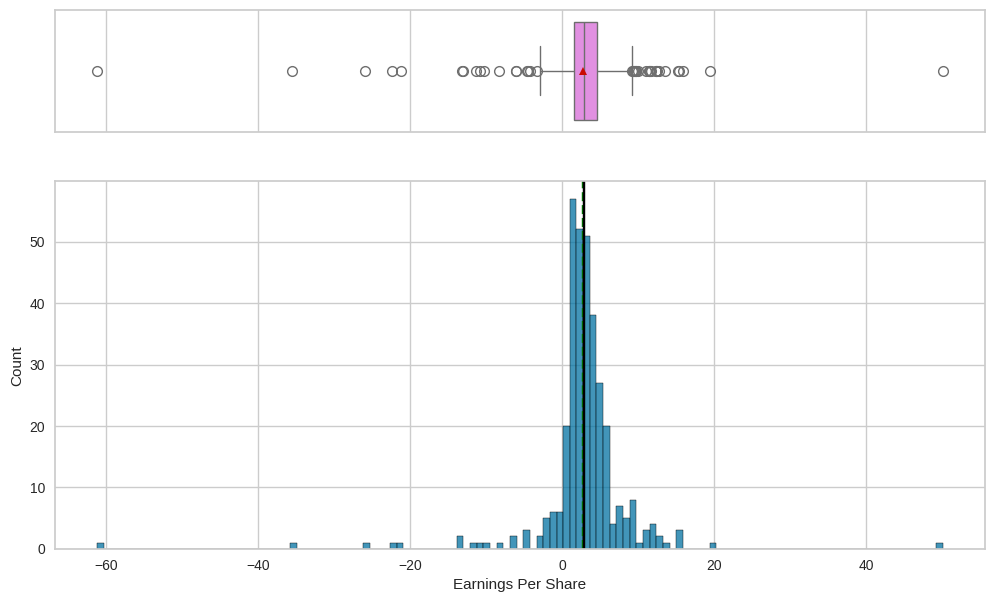

In [23]:
histogram_boxplot(df, 'Earnings Per Share')

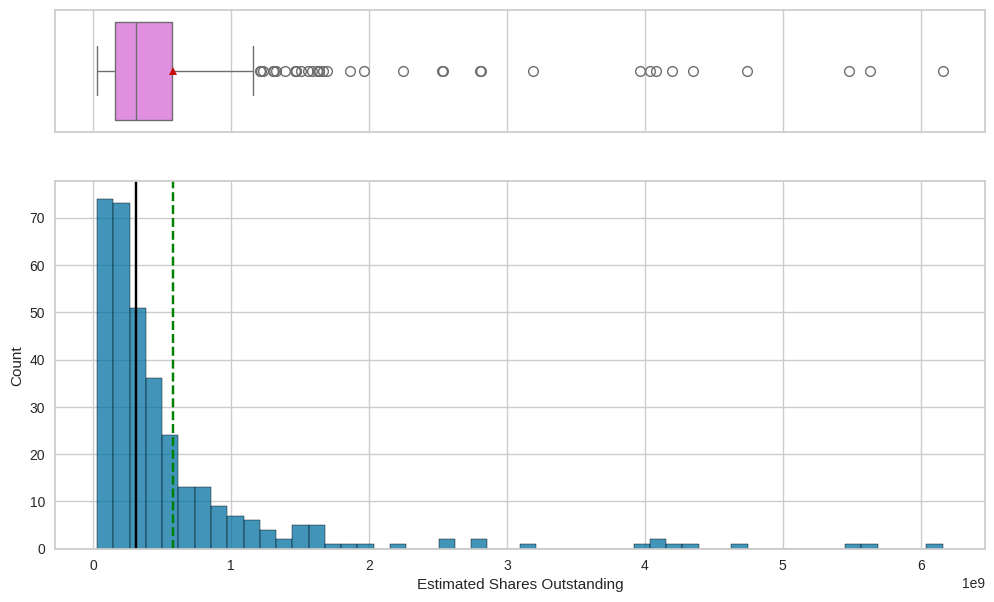

In [24]:
histogram_boxplot(df, 'Estimated Shares Outstanding')

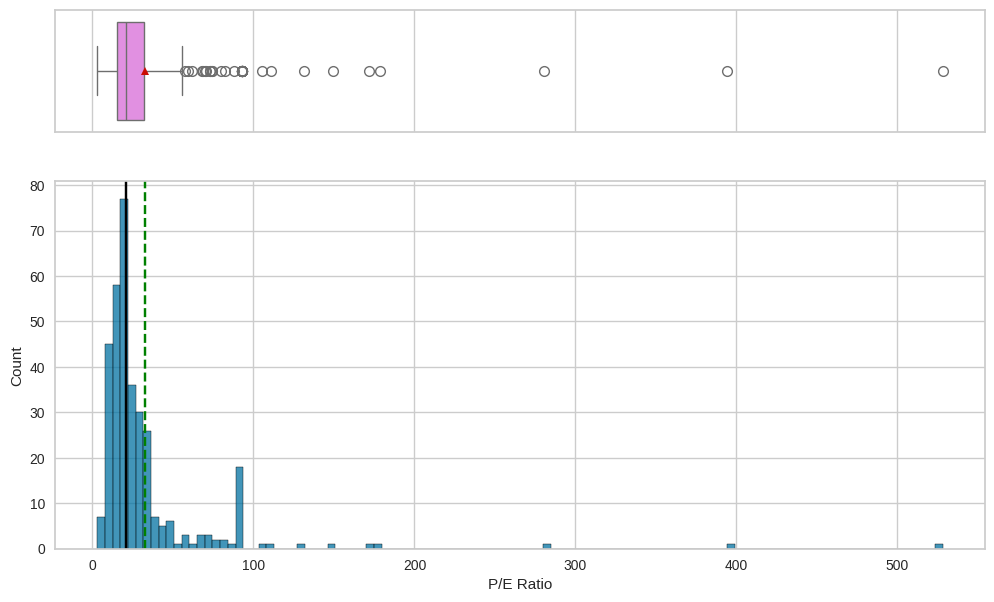

In [25]:
histogram_boxplot(df, 'P/E Ratio')

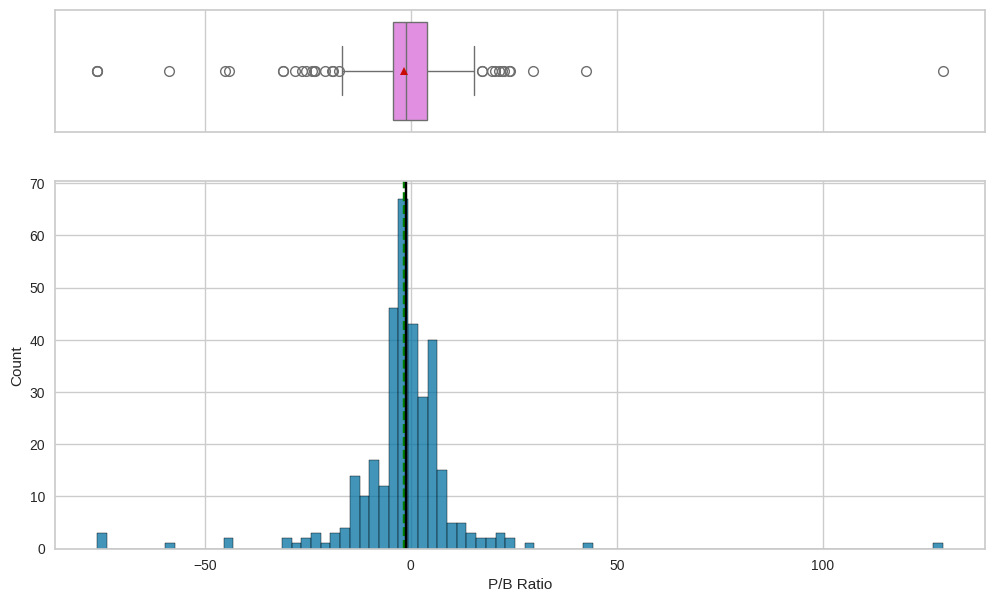

In [26]:
histogram_boxplot(df, 'P/B Ratio')

In [32]:
# function to create labeled barplots


def labeled_barplot(df, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(df[feature])  # length of the column
    count = df[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=df,
        x=feature,
        palette="Paired",
        order=df[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

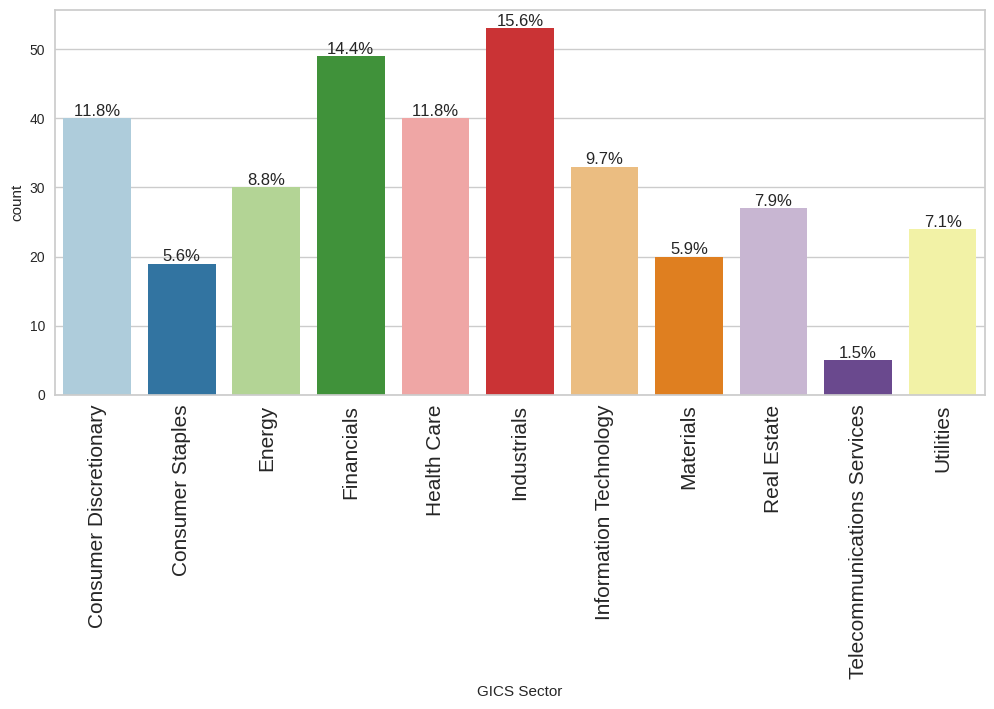

In [33]:
labeled_barplot(df, 'GICS Sector', perc=True)

Industrials is the largest sector at 15.6% followed by financals at 14.4%
Telecommunications is the smallest with only 1.5%

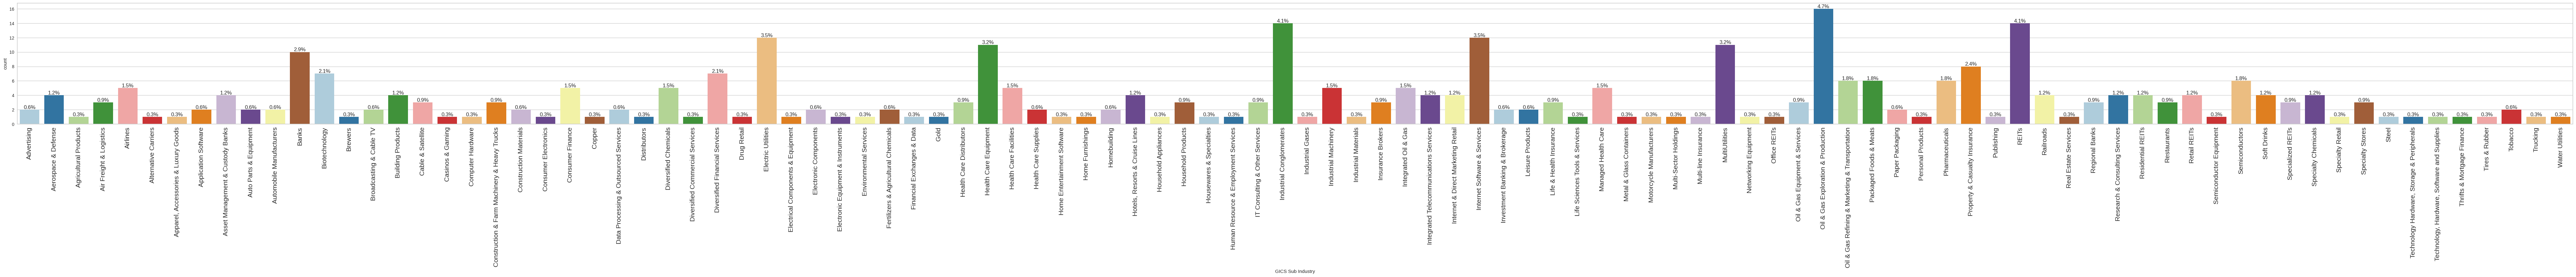

In [34]:
labeled_barplot(df, 'GICS Sub Industry', perc = True)

The most significant sub industry at 4.7% is Oil & Gas Exploration and Production, followed by REITS at 4.1%
There are a large number of subindustries at 0.3%

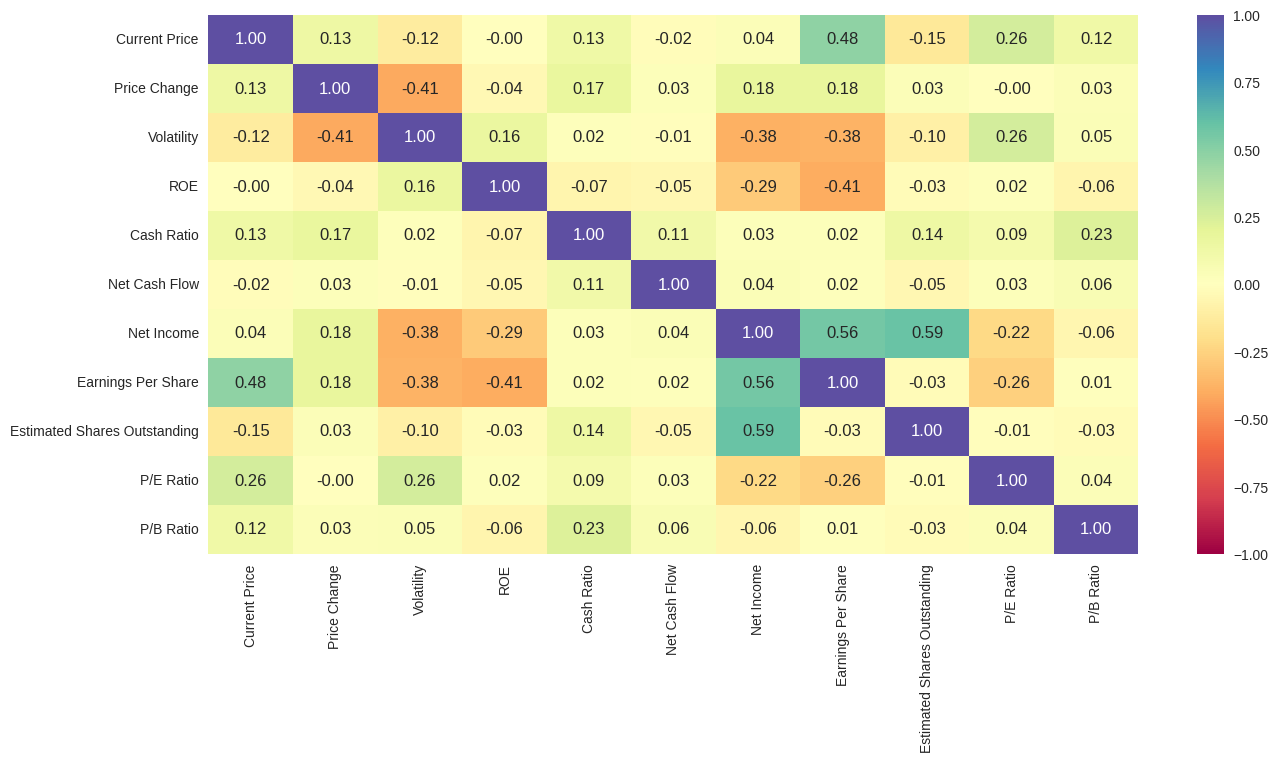

In [36]:
# correlation check
plt.figure(figsize=(15, 7))
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(
    numeric_df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

.There are no strong correlations over 0.7 in the data.
.The highest positive correlations are between Net Income and both Earnings per Share and Estimated Shares Outstanding. This makes sense because companies with higher income usually have more shares and higher share values.
.The biggest negative correlation is between Earnings per Share and ROE (Return on Equity).

**Let's check the stocks of which economic sector have seen the maximum price increase on average.**

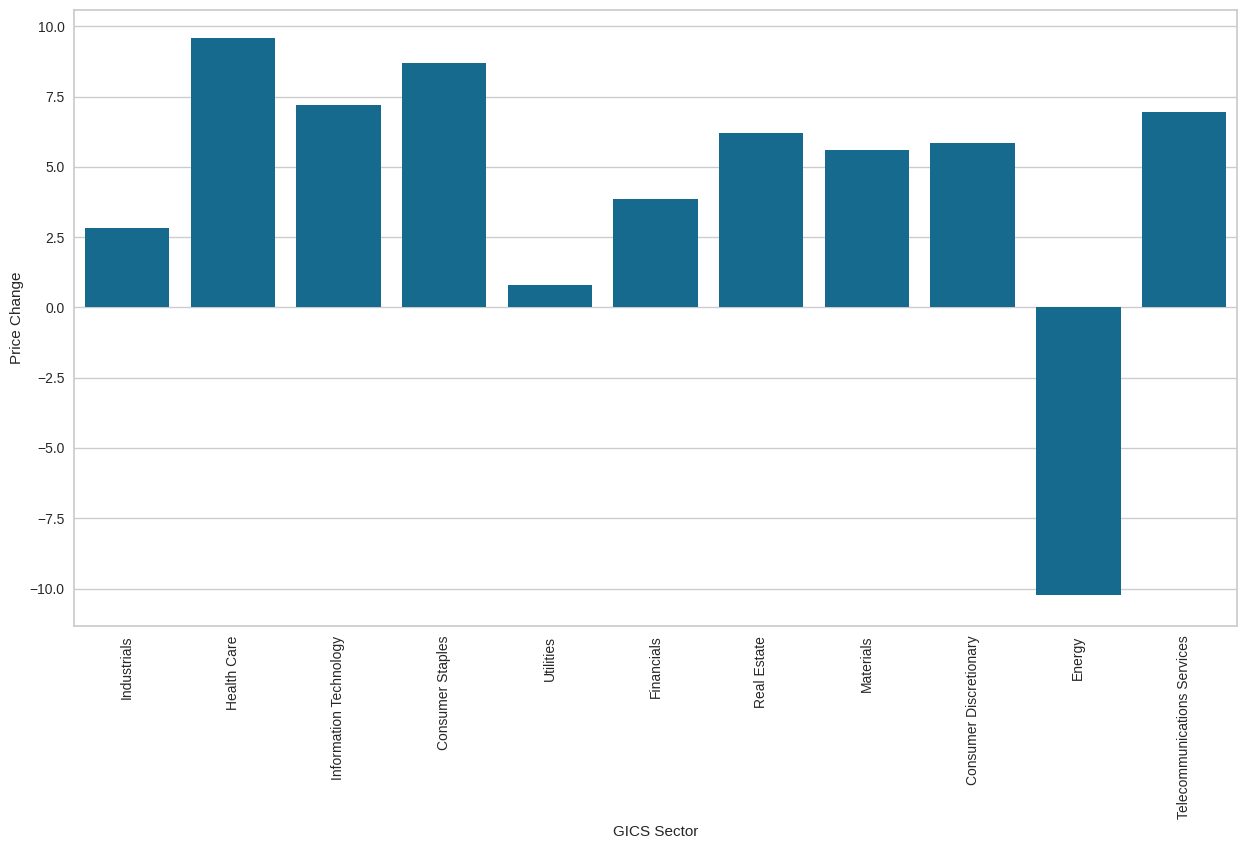

In [37]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='GICS Sector', y='Price Change', ci=False)  ## Complete the code to choose the right variables
plt.xticks(rotation=90)
plt.show()

The Health Care sector shows the highest average price increase, followed by Consumer Staples. In contrast, the Energy sector has seen a decrease in stock prices.

## Data Preprocessing

**-Data preprocessing** is a crucial step in data analysis and machine learning, where raw data is transformed into a clean, organized, and structured format that models can effectively use. The process includes several steps:

**Data Cleaning:** This involves handling missing data (e.g., filling in or removing missing values), removing duplicates, and correcting errors or inconsistencies in the data.

**Data Transformation:** Raw data is often transformed to fit the requirements of a machine learning model. This includes:

**Scaling/Normalization:** Adjusting numerical data to a standard range or scale (e.g., 0 to 1) so that no single feature dominates.

**Encoding:** Converting categorical data (like text labels) into a numeric format that models can process.

**Handling Outliers:** Identifying and addressing unusual data points that can skew analysis or model predictions.

**Feature Selection/Engineering:** This step focuses on selecting the most important features or creating new ones to improve the performance of the model.

In summary, data preprocessing ensures the raw data is consistent, structured, and ready for analysis or modeling, leading to more reliable and accurate results.

### Outlier Check



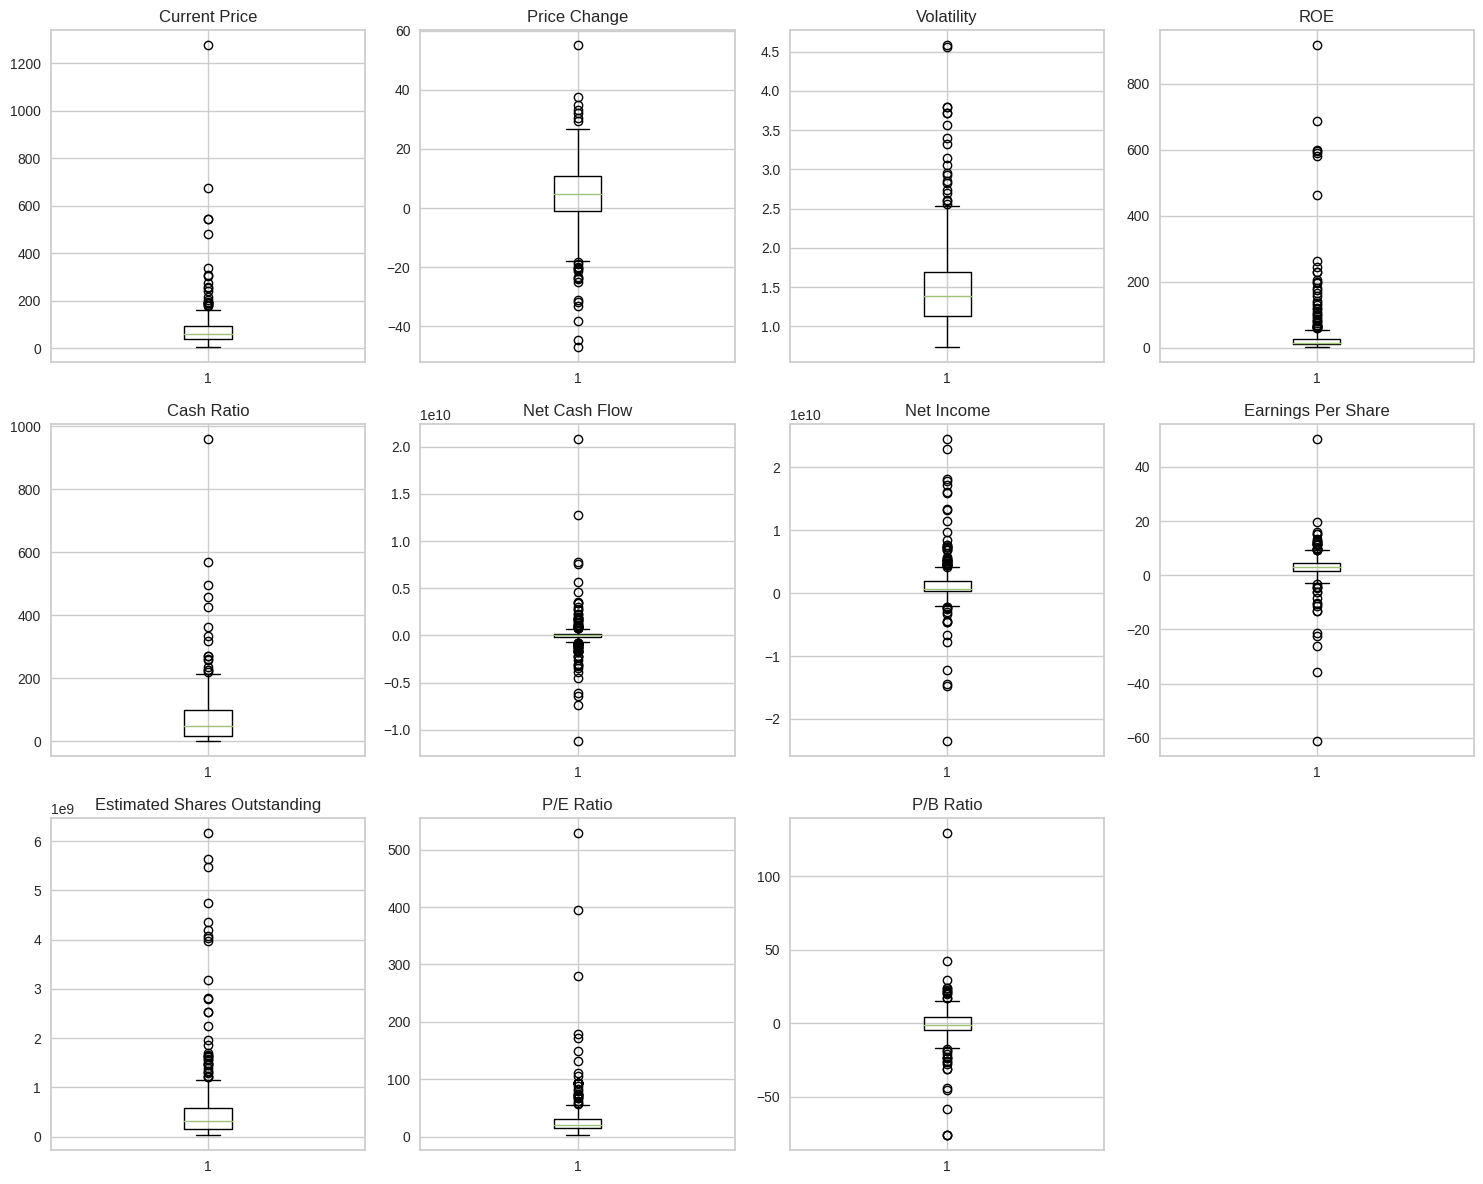

In [38]:
plt.figure(figsize=(15, 12))

numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

### Scaling



In [39]:
# scaling the data before clustering
scaler = StandardScaler()
subset = df.select_dtypes(include=np.number).columns.copy()  # Select only numerical columns for scaling
subset_scaled = scaler.fit_transform(df[subset]) # Apply scaling to the numerical columns of the DataFrame

In [40]:
# creating a dataframe of the scaled data
subset_scaled_df = df.select_dtypes(include=np.number).columns.copy()

## K-means Clustering

In [43]:
k_means_df = subset_scaled_df.copy()

this line of code is used to create a separate, independent version of subset_scaled_df for further processing, particularly for applying K-means clustering without altering the original data.

Number of Clusters: 1 	Average Distortion: 2455023529.188012
Number of Clusters: 2 	Average Distortion: 1938940215.304373
Number of Clusters: 3 	Average Distortion: 1820131898.1529639
Number of Clusters: 4 	Average Distortion: 1743273466.1066751
Number of Clusters: 5 	Average Distortion: 1343717954.5595388
Number of Clusters: 6 	Average Distortion: 1234335200.523433
Number of Clusters: 7 	Average Distortion: 1185296966.7232966
Number of Clusters: 8 	Average Distortion: 1120494012.8899376
Number of Clusters: 9 	Average Distortion: 1055805366.5878597
Number of Clusters: 10 	Average Distortion: 988944945.9383076
Number of Clusters: 11 	Average Distortion: 956720074.7772263
Number of Clusters: 12 	Average Distortion: 927060843.8890512
Number of Clusters: 13 	Average Distortion: 900717352.0261475
Number of Clusters: 14 	Average Distortion: 869333351.5224317


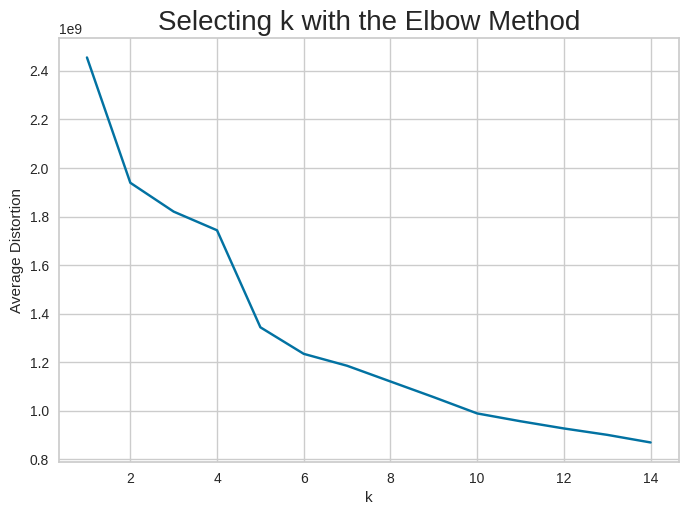

In [45]:
# creating a dataframe of the scaled data
subset_scaled_df = df.select_dtypes(include=np.number) #changed to return the dataframe instead of index

#creating a copy of scaled numeric features
k_means_df = subset_scaled_df.copy()

clusters = range(1, 15)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k, random_state=1)
    model.fit(subset_scaled_df) # subset_scaled_df now contains only numeric features
    prediction = model.predict(k_means_df)
    distortion = (
        sum(np.min(cdist(k_means_df, model.cluster_centers_, "euclidean"), axis=1))
        / k_means_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)
plt.show()

This code snippet implements the Elbow Method to help determine the optimal number of clusters (K) for K-means clustering.

The following output summarizes the Average Distortion values for various numbers of clusters (K) ranging from 1 to 14. Average Distortion is a measure of how well the data points fit into the clusters, with lower values indicating better fit.

Summary of Results:

K = 1: The Average Distortion is 2,455,023,529.19. With only one cluster, all data points are grouped together, leading to a high distortion value, which indicates that the data points are far from the cluster center.

K = 2: The Average Distortion decreases to 1,938,940,215.30. Introducing a second cluster significantly reduces distortion, suggesting a better fit as the data points start to group into more meaningful clusters.

K = 3 to K = 6: The distortion continues to decline steadily, reaching 1,343,717,954.56 at K = 5. This indicates that as we increase the number of clusters, the data points are getting closer to their respective cluster centers.

K = 7 to K = 14: While the distortion keeps decreasing, the rate of reduction slows down. For instance, at K = 10, the distortion is 988,944,945.94, and it drops only slightly to 869,333,351.52 by K = 14. This suggests that beyond a certain point, the addition of more clusters yields diminishing returns in terms of improvement.


These results indicate that while increasing the number of clusters generally improves the fit of the model, there is a point where the benefits become marginal.

The optimal number of clusters can often be found by identifying the "elbow" point on a graph plotting Average Distortion against the number of clusters. In this case, a potential elbow may appear around K = 6 or K = 7, where the distortion has decreased substantially but does not continue to drop sharply as more clusters are added.



# Let's check the silhouette scores

The Silhouette Score is a metric used to evaluate the quality of clustering. It ranges from -1 to +1: a score close to +1 indicates that a data point is well-clustered and closer to its own group than to others, while a score near -1 suggests that the point may be in the wrong cluster. By calculating silhouette scores for different numbers of clusters (K), you can determine the optimal K that results in well-defined and distinct clusters. Higher average silhouette scores indicate better clustering quality.

For n_clusters = 2, the silhouette score is 0.7627873731216136)
For n_clusters = 3, the silhouette score is 0.7729751861632831)
For n_clusters = 4, the silhouette score is 0.7678587461332073)
For n_clusters = 5, the silhouette score is 0.6376206830112046)
For n_clusters = 6, the silhouette score is 0.3916511917331783)
For n_clusters = 7, the silhouette score is 0.4350364210193519)
For n_clusters = 8, the silhouette score is 0.48360468152161956)
For n_clusters = 9, the silhouette score is 0.47589235875088837)
For n_clusters = 10, the silhouette score is 0.4473986620183917)
For n_clusters = 11, the silhouette score is 0.4517576625140701)
For n_clusters = 12, the silhouette score is 0.4544297663671246)
For n_clusters = 13, the silhouette score is 0.4624596593577656)
For n_clusters = 14, the silhouette score is 0.46184740572440475)


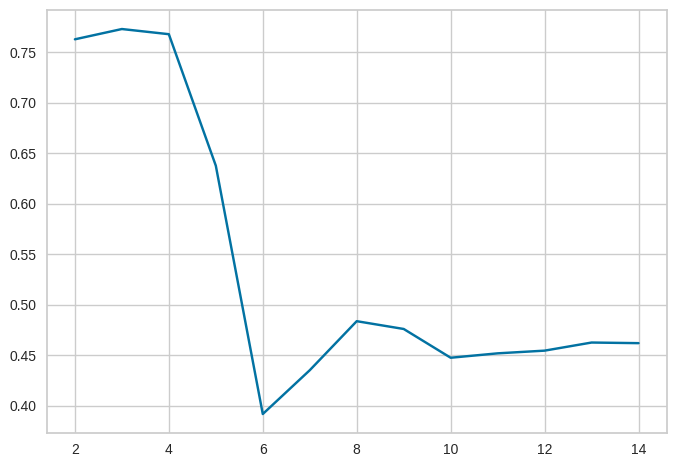

In [46]:
sil_score = []
cluster_list = range(2, 15)
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    preds = clusterer.fit_predict((subset_scaled_df))
    score = silhouette_score(k_means_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list, sil_score)
plt.show()

The output shows the silhouette scores for different numbers of clusters:

K = 2: The silhouette score is 0.76. This indicates that the clusters are well-separated and that the data points are relatively close to their assigned cluster center.

K = 3: The silhouette score increases slightly to 0.77, suggesting even better clustering quality.

K = 4: The score drops to 0.76. This indicates that while the quality remains high, it's slightly lower than for K = 3.

K = 5: The silhouette score decreases significantly to 0.63, suggesting that adding another cluster may not have improved the clustering quality.

K = 6: The score continues to drop to 0.39, indicating poorer clustering quality, suggesting that the clusters may be overlapping more.

K = 7 to K = 14: The scores fluctuate slightly, generally hovering around the 0.4 to 0.5 range. This suggests that increasing the number of clusters beyond 5 does not provide a clear improvement in cluster separation.


**From the results, the optimal number of clusters appears to be around 3 or 4, where the silhouette scores are the highest.** As more clusters are added, the scores begin to decrease, indicating that the added complexity does not improve the quality of clustering and may lead to overlapping clusters. The silhouette score helps in making an informed decision about the appropriate number of clusters to use for K-means clustering.



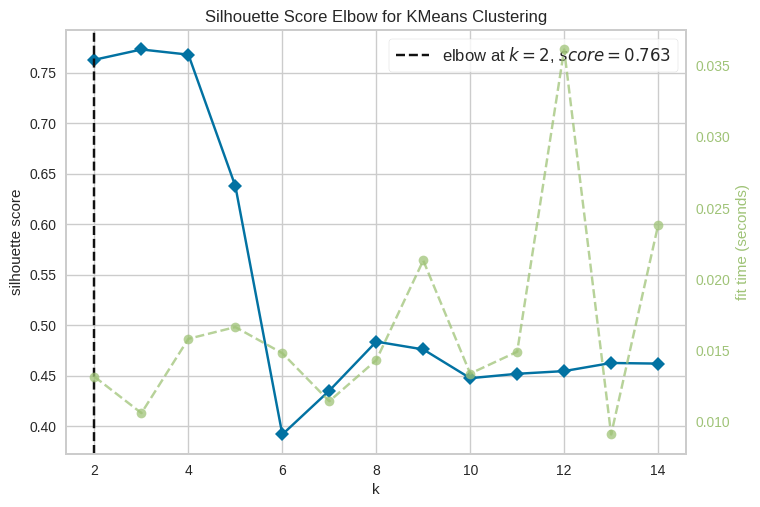

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [47]:
#KElbowVisualizer for Elbow Method
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2, 15), metric="silhouette", timings=True)
visualizer.fit(k_means_df)
visualizer.show()

This part visualizes the elbow method using silhouette scores to determine the best number of clusters.

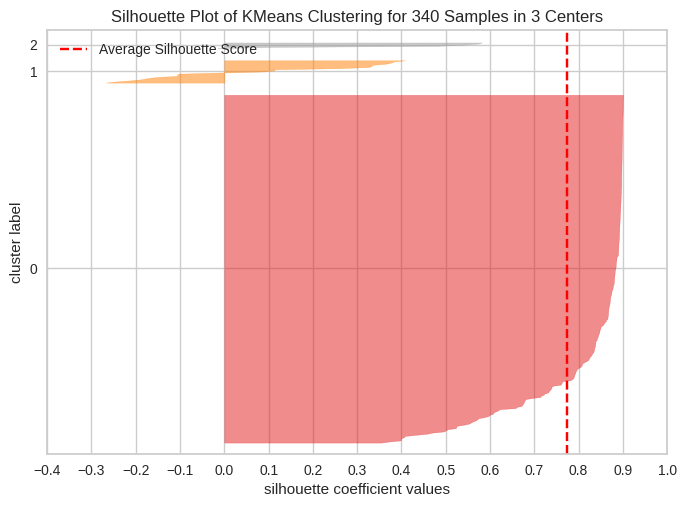

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [49]:
# Finding Optimal Number of Clusters with Silhouette Coefficients
#This is where you visualize the silhouette scores for a specific number of clusters.

visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))  ## Complete the code to visualize the silhouette scores for certain number of clusters
visualizer.fit(k_means_df)
visualizer.show()

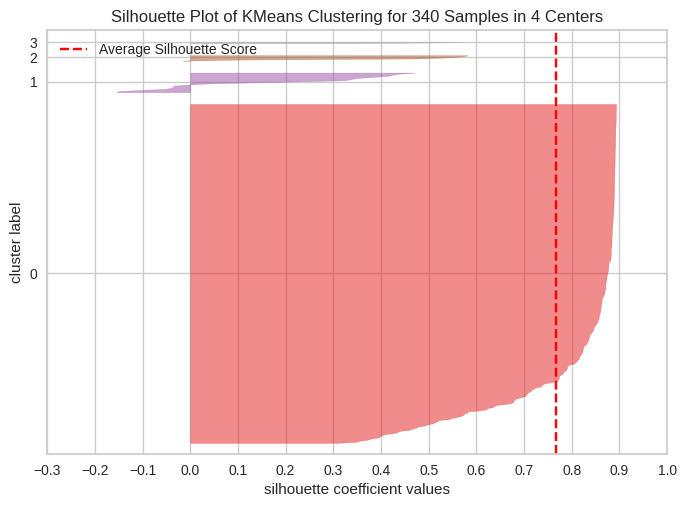

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [48]:
# Finding Optimal Number of Clusters with Silhouette Coefficients
#This is where you visualize the silhouette scores for a specific number of clusters.

visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))  ## Complete the code to visualize the silhouette scores for certain number of clusters
visualizer.fit(k_means_df)
visualizer.show()

In [50]:
# Creating Final Model
#Here, you finalize your K-means model using the optimal number of clusters determined earlier and add the cluster labels to your data

kmeans = KMeans(n_clusters=4, random_state=1)  ## Complete the code to choose the number of clusters
kmeans.fit(k_means_df)

# Creating a copy of the original data
df1 = df.copy()

# Adding KMeans cluster labels to the original and scaled dataframes
k_means_df["KM_segments"] = kmeans.labels_
df1["KM_segments"] = kmeans.labels_

In [52]:
#Cluster Profiling
#This section profiles the clusters by calculating the mean values of
#numerical features and counting the companies in each cluster.

# Select only numerical columns for calculating the mean
numerical_cols = df1.select_dtypes(include=['number']).columns
km_cluster_profile = df1.groupby("KM_segments")[numerical_cols].mean()

km_cluster_profile["count_in_each_segment"] = (
    df1.groupby("KM_segments")["Security"].count().values
)

for cl in df1["KM_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df1[df1["KM_segments"] == cl]["Security"].unique())
    print()
df1.groupby(["KM_segments", "GICS Sector"])['Security'].count()

In cluster 1, the following companies are present:
['American Airlines Group' 'Amgen Inc' 'Citigroup Inc.'
 'The Walt Disney Company' 'Ford Motor' 'Gilead Sciences' 'General Motors'
 'International Business Machines' 'JPMorgan Chase & Co.'
 'Coca Cola Company' 'Mondelez International' 'Pfizer Inc.'
 'Philip Morris International' 'AT&T Inc' 'United Continental Holdings'
 'United Technologies' 'Verizon Communications' 'Wells Fargo'
 'Exxon Mobil Corp.']

In cluster 0, the following companies are present:
['AbbVie' 'Abbott Laboratories' 'Adobe Systems Inc' 'Analog Devices, Inc.'
 'Archer-Daniels-Midland Co' 'Alliance Data Systems' 'Ameren Corp'
 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp' 'Allegion'
 'Alexion Pharmaceuticals' 'Applied Materials Inc' 'AMETEK Inc'
 'Affiliated Managers Group Inc' 'Ameripr

KM_segments  GICS Sector                
0            Consumer Discretionary         37
             Consumer Staples               16
             Energy                         24
             Financials                     45
             Health Care                    37
             Industrials                    50
             Information Technology         31
             Materials                      19
             Real Estate                    27
             Telecommunications Services     3
             Utilities                      24
1            Consumer Discretionary          3
             Consumer Staples                3
             Energy                          1
             Financials                      3
             Health Care                     3
             Industrials                     3
             Information Technology          1
             Telecommunications Services     2
2            Energy                          5
             Materials                       1
3            Financials                      1
             Information Technology          1
Name: Security, dtype: int64

Cluster 0 shows the most diverse sector representation, with a significant number of companies in Consumer Discretionary (37), Financials (45), and Industrials (50). This diversity indicates that Cluster 0 is likely a mix of different industries.

Cluster 1 has a balanced representation across several sectors, with a notable presence in Consumer Discretionary, Consumer Staples, and Financials.

Cluster 2 is focused solely on the Energy sector, which is consistent with the specific companies identified in this cluster.

Cluster 3 has limited sector representation, showing just Financials and Information Technology.



**Cluster Analysis:** The clusters reveal how companies group together based on certain characteristics, potentially reflecting similarities in their operational strategies, market dynamics, or performance metrics.


**Sector Analysis:** Understanding the sector distribution across clusters helps identify which industries are overrepresented or underrepresented in each cluster. This insight can guide investment strategies or sector-focused analyses.


**Business Strategy:** The distinct clustering of companies might suggest strategic opportunities or partnerships. For instance, companies in Cluster 1 might find synergistic opportunities with those in Cluster 0 due to their diverse but complementary offerings.






## Hierarchical Clustering

In [53]:
hc_df = subset_scaled_df.copy()

In [54]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"] ## Complete the code to add distance metrics

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"] ## Complete the code to add linkages

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(hc_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(hc_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print('*'*100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Cophenetic correlation for Euclidean distance and single linkage is 0.9385988812038429.
Cophenetic correlation for Euclidean distance and complete linkage is 0.8106438475926677.
Cophenetic correlation for Euclidean distance and average linkage is 0.9400112932383541.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.6813110250756654.
Cophenetic correlation for Chebyshev distance and single linkage is 0.9446516187466529.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.8502647885515658.
Cophenetic correlation for Chebyshev distance and average linkage is 0.9063768052229675.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.6597655741477875.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.5520201059596208.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.4849834179022609.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.5521718718171815.
Cophenetic co

**Let's explore different linkage methods with Euclidean distance only.**

In [55]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"] ## Complete the code to add linkages

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(hc_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(hc_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print('*'*100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Cophenetic correlation for single linkage is 0.9385988812038429.
Cophenetic correlation for complete linkage is 0.8106438475926677.
Cophenetic correlation for average linkage is 0.9400112932383541.
Cophenetic correlation for centroid linkage is 0.9447405794645376.
Cophenetic correlation for ward linkage is 0.782290736502474.
Cophenetic correlation for weighted linkage is 0.6813110250756654.
****************************************************************************************************
Highest cophenetic correlation is 0.9447405794645376, which is obtained with centroid linkage.


**Let's view the dendrograms for the different linkage methods with Euclidean distance.**

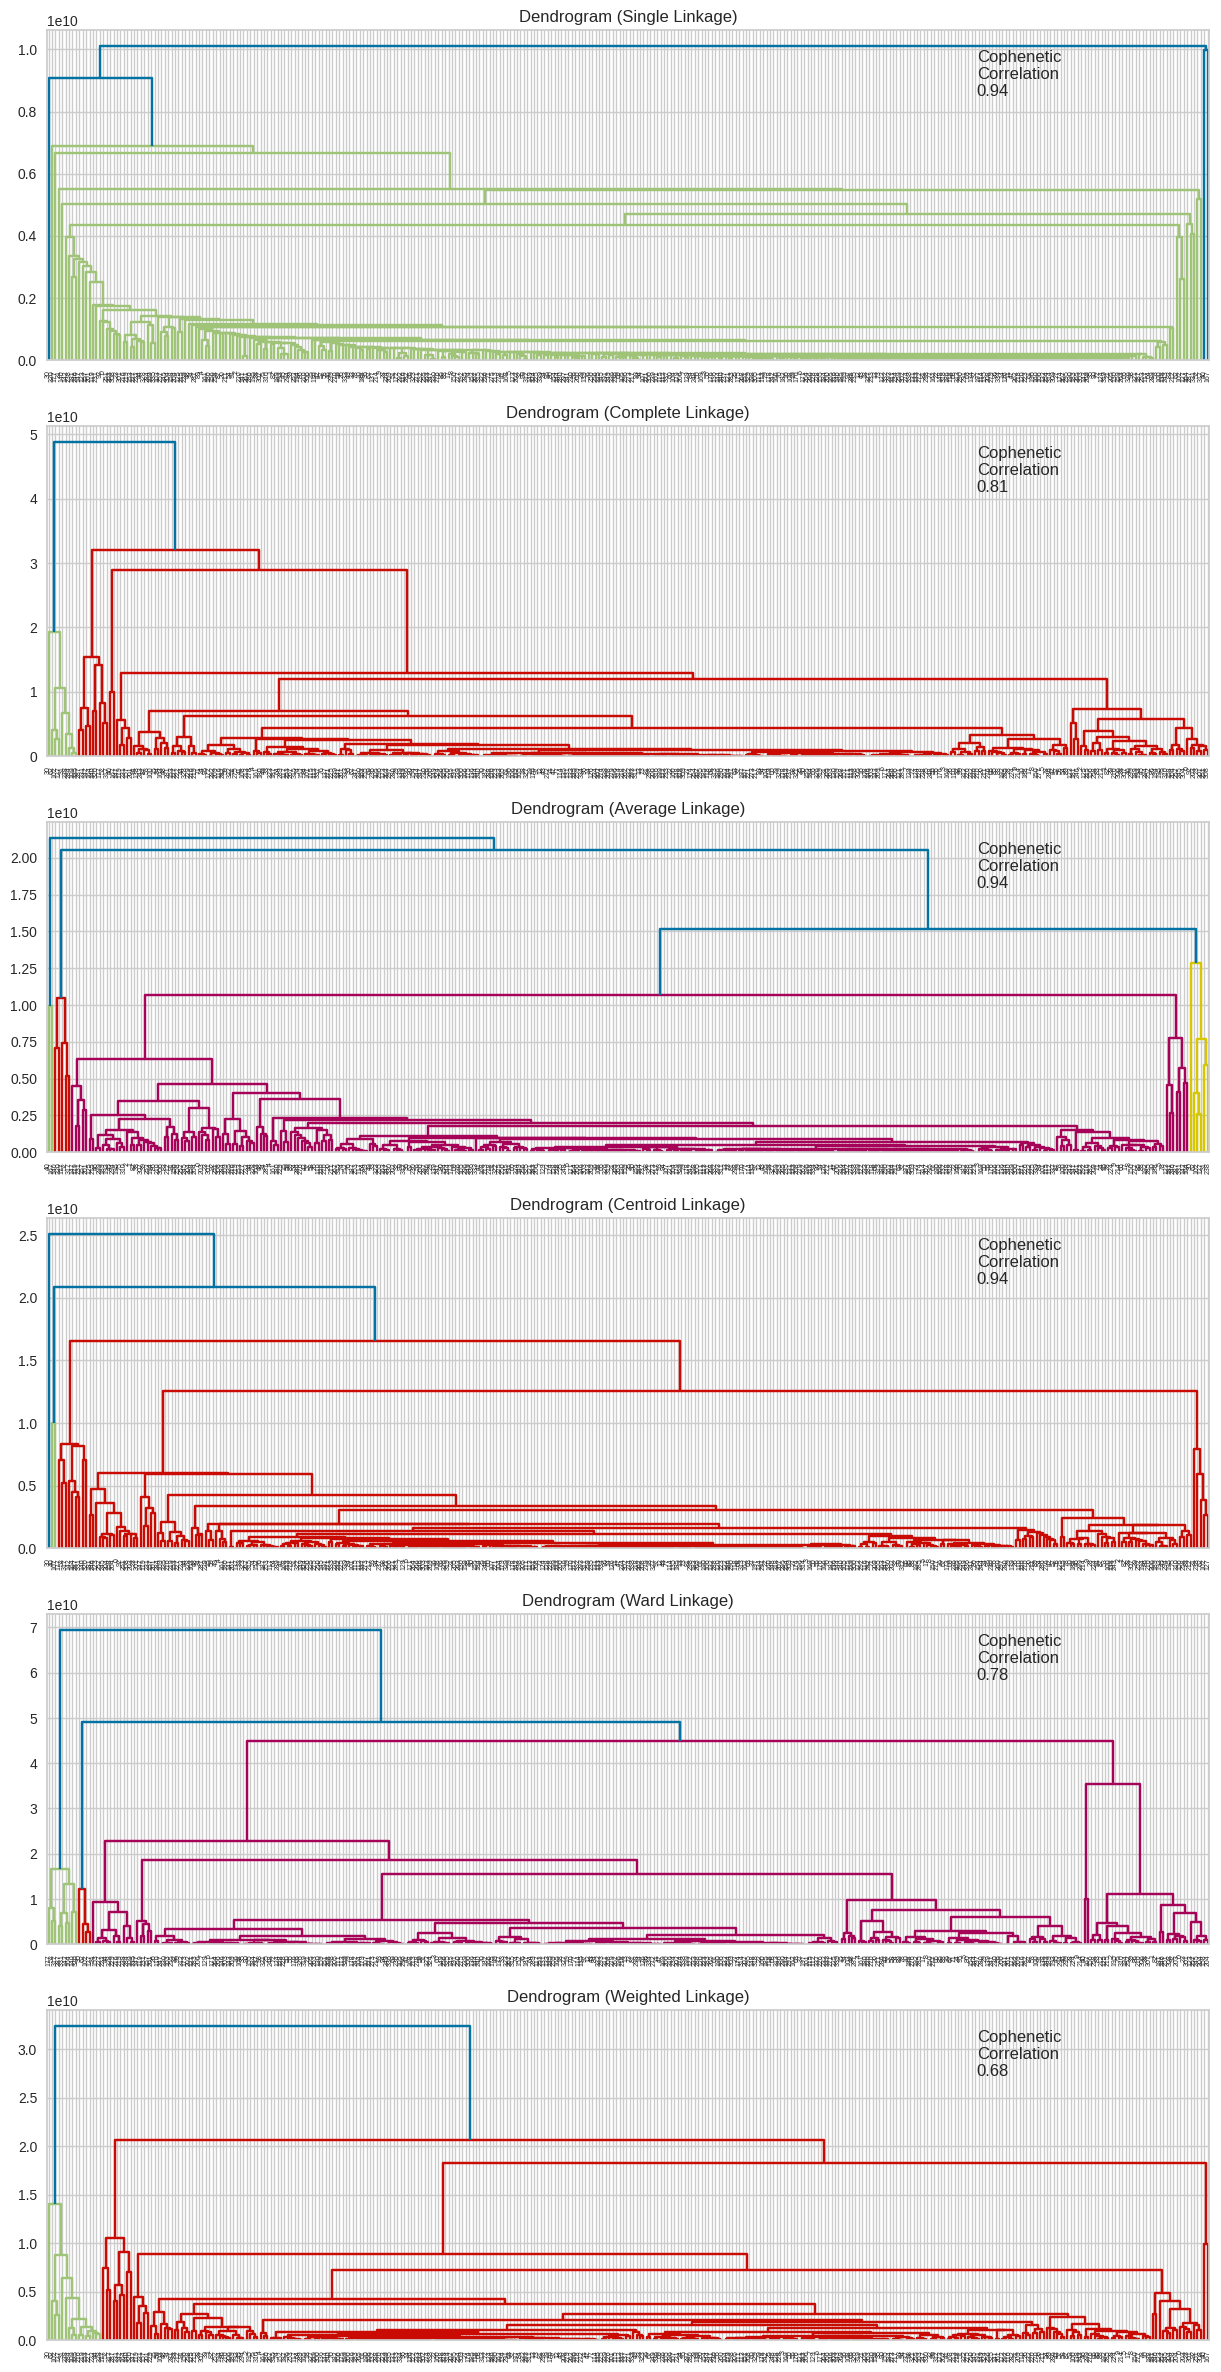

In [56]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"] ## Complete the code to add linkages

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(hc_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(hc_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

    compare.append([method, coph_corr])

In [57]:
# create and print a dataframe to compare cophenetic correlations for different linkage methods
df_cc = pd.DataFrame(compare, columns=compare_cols)
df_cc = df_cc.sort_values(by="Cophenetic Coefficient")
df_cc

,Linkage,Cophenetic Coefficient
5,weighted,0.681311
4,ward,0.782291
1,complete,0.810644
0,single,0.938599
2,average,0.940011
3,centroid,0.944741


Best Linkage Method:

The centroid linkage method has the highest cophenetic coefficient of 0.944741. This suggests that it provides the best representation of the pairwise distances in your original data.
Other Notable Methods:

The average linkage and single linkage methods also perform well, with coefficients of 0.940011 and 0.938599, respectively. These methods also preserve the structure of the original data effectively.
Lower Performing Methods:

The weighted linkage method has the lowest cophenetic coefficient of 0.681311, suggesting it does not preserve the original distances as well as the other methods. The Ward method, while better than weighted, still performs relatively lower at 0.782291.


In [60]:
# Remove the `affinity` parameter since it's not used with 'average' linkage.
HCmodel = AgglomerativeClustering(n_clusters=3, linkage="average")
HCmodel.fit(hc_df)

AgglomerativeClustering(linkage='average', n_clusters=3)

In [61]:
# creating a copy of the original data
df2 = df.copy()

# adding hierarchical cluster labels to the original and scaled dataframes
hc_df["HC_segments"] = HCmodel.labels_
df2["HC_segments"] = HCmodel.labels_

In cluster 0, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Analog Devices, Inc.' 'Archer-Daniels-Midland Co'
 'Alliance Data Systems' 'Ameren Corp' 'American Electric Power'
 'AFLAC Inc' 'American International Group, Inc.'
 'Apartment Investment & Mgmt' 'Assurant Inc' 'Arthur J. Gallagher & Co.'
 'Akamai Technologies Inc' 'Albemarle Corp' 'Alaska Air Group Inc'
 'Allstate Corp' 'Allegion' 'Alexion Pharmaceuticals'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Amgen Inc' 'Ameriprise Financial' 'American Tower Corp A'
 'Amazon.com Inc' 'AutoNation Inc' 'Anthem Inc.' 'Aon plc'
 'Apache Corporation' 'Anadarko Petroleum Corp' 'Amphenol Corp'
 'Arconic Inc' 'Activision Blizzard' 'AvalonBay Communities, Inc.'
 'Broadcom' 'American Water Works Company Inc' 'American Express Co'
 'Boeing Company' 'Baxter International Inc.' 'BB&T Corporation'
 'Bard (C.R.) Inc.' 'Baker Hughes Inc' 'BIOGEN IDEC Inc

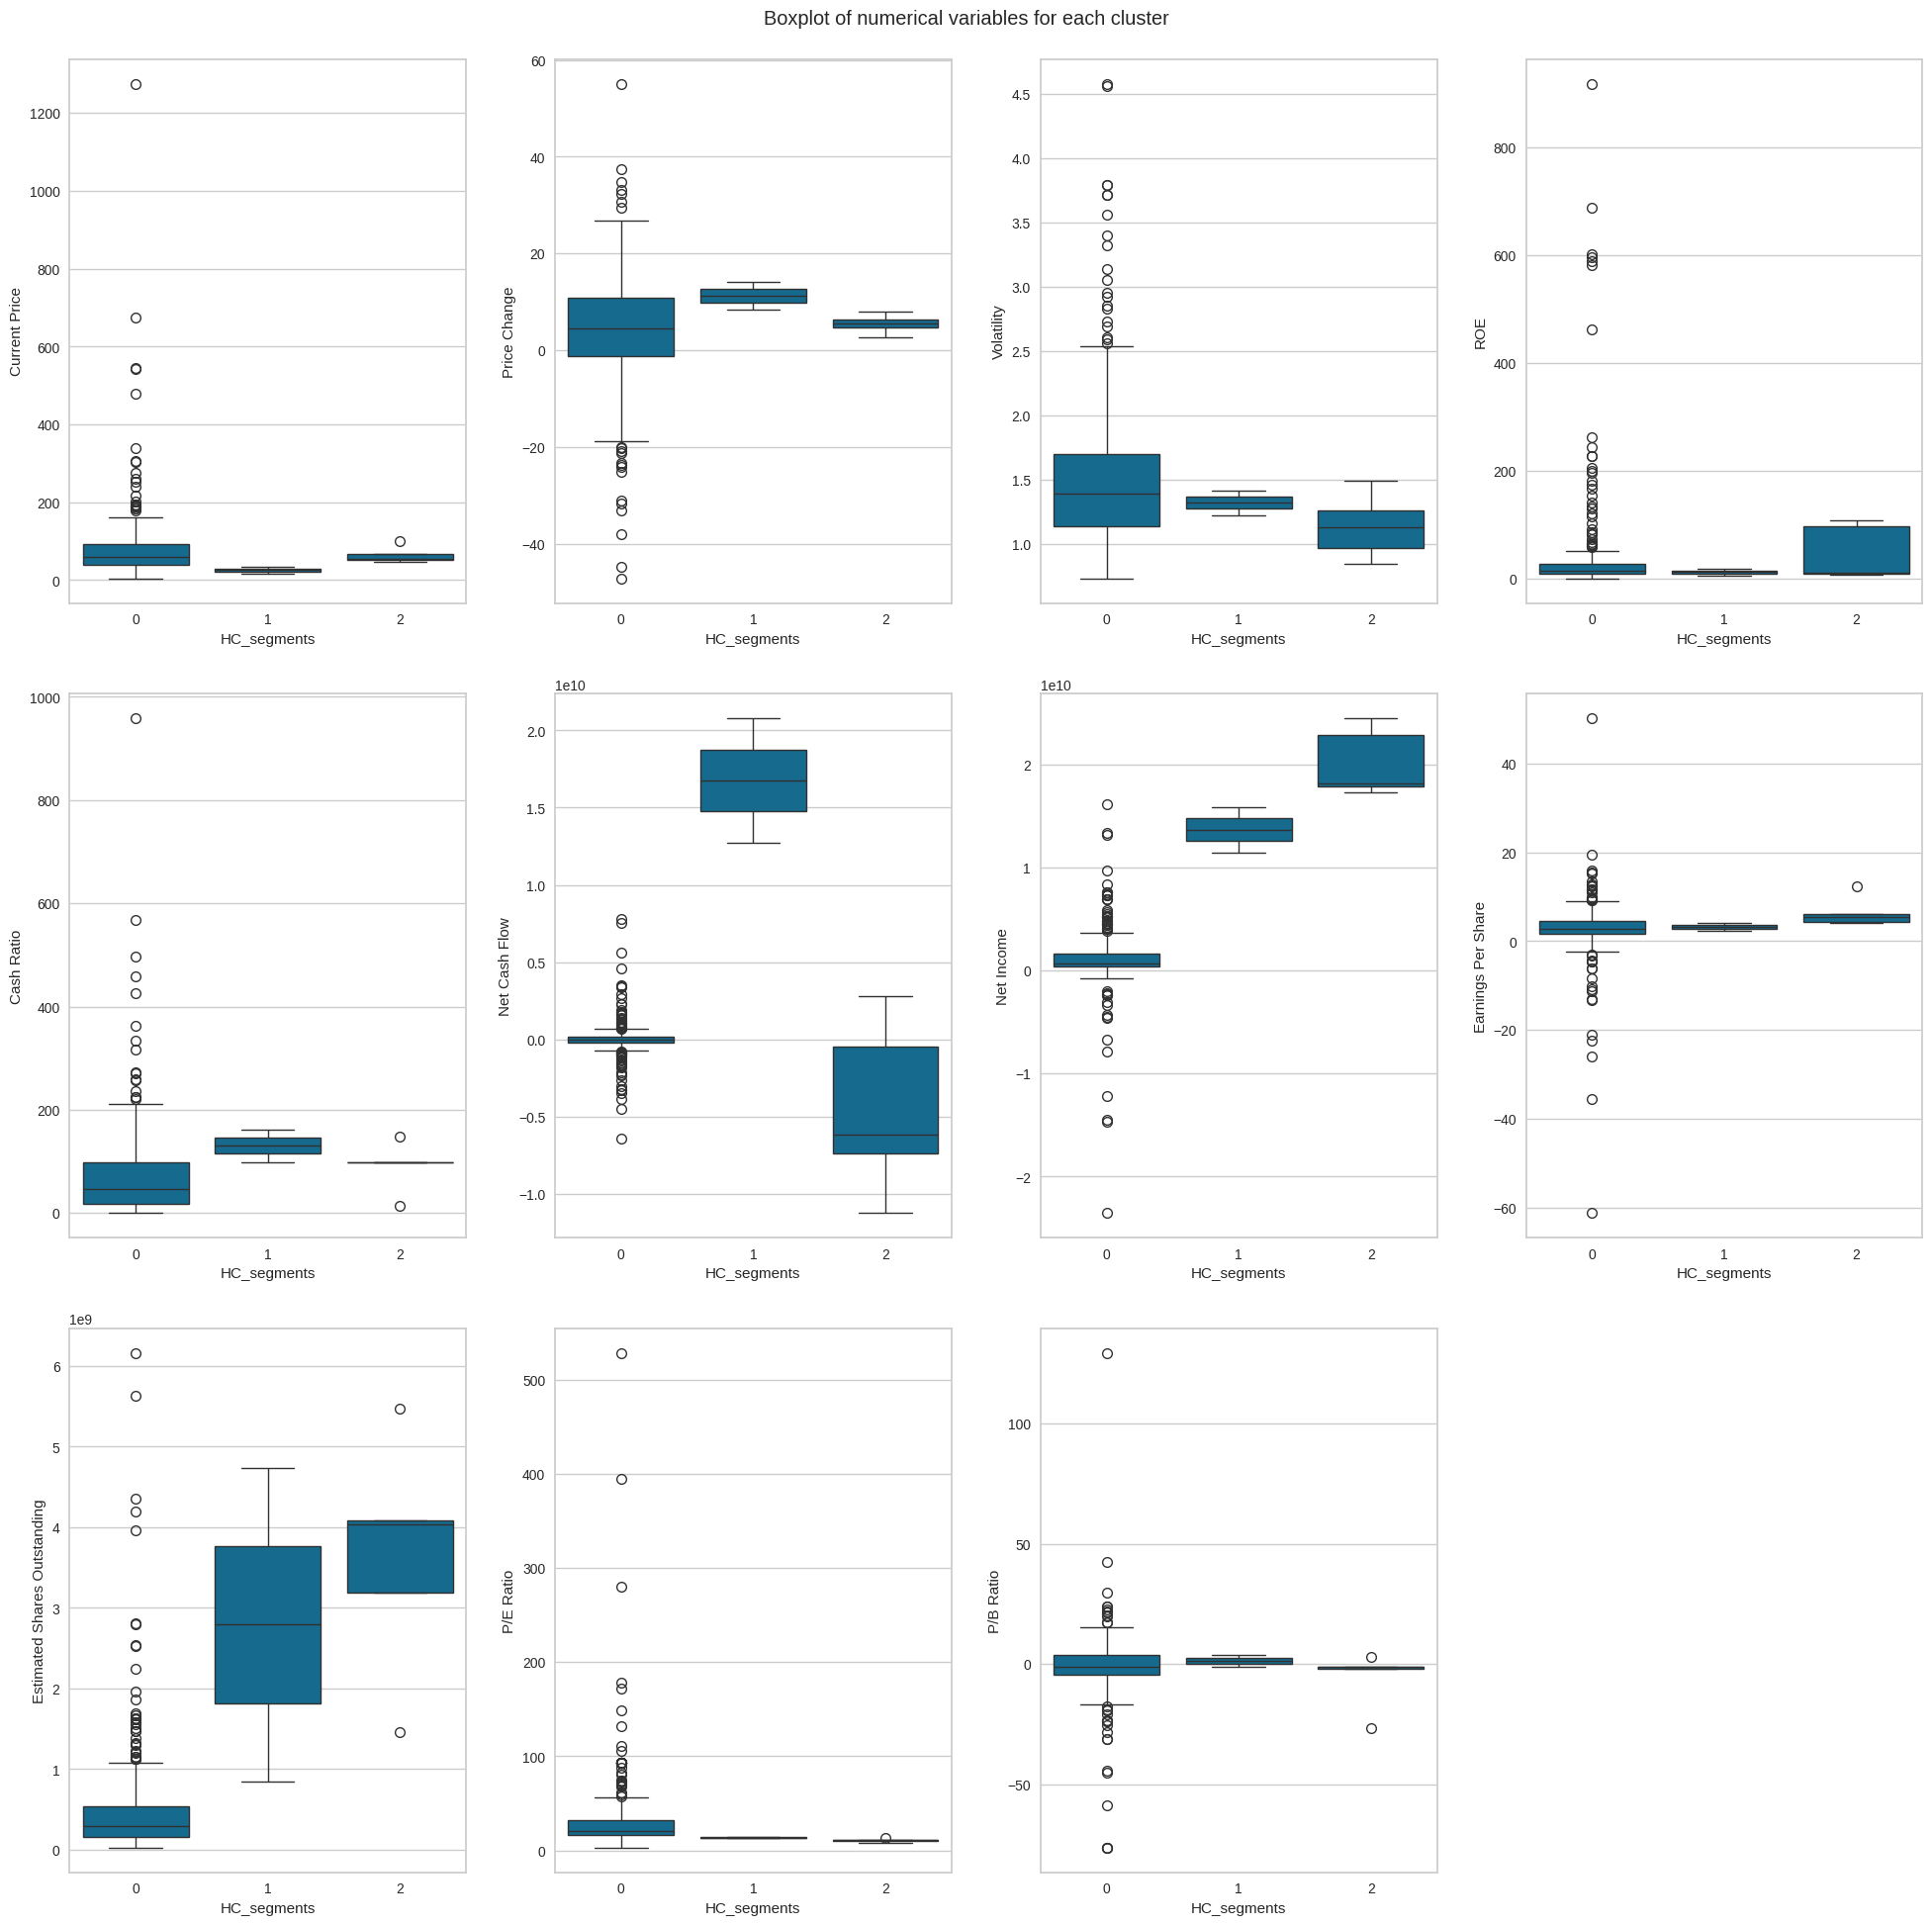

In [65]:
# Cluster Profiling
hc_cluster_profile = df2.groupby("HC_segments").agg({
    # Specify aggregation function for each column
    "Security": "first",  # Or any other appropriate function for 'Security' like 'nunique' for number of unique companies
    "P/B Ratio": "mean",  # Example for numerical columns, adapt for all num_col
    # ... other numerical columns with 'mean' or other aggregations
})

# Add count of companies in each segment
hc_cluster_profile["count_in_each_segment"] = df2.groupby("HC_segments")["Security"].count().values

# Display the DataFrame with highlighted maximum values for numerical columns only
numeric_cols = hc_cluster_profile.select_dtypes(include="number").columns  # Select only numerical columns for highlighting
hc_cluster_profile.style.highlight_max(color="lightgreen", axis=0, subset=numeric_cols)


# Print the companies in each cluster
for cl in df2["HC_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df2[df2["HC_segments"] == cl]["Security"].unique())  # Get unique companies in each cluster
    print()

# Grouping by HC_segments and GICS Sector
sector_counts = df2.groupby(["HC_segments", "GICS Sector"])['Security'].count()
print(sector_counts)

# Plotting boxplots of numerical variables for each cluster
plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")

# Define num_col here before using it in the loop
num_col = df2.select_dtypes(include=['number']).columns.tolist() # Assuming you want all numerical columns in df2
# remove 'HC_segments' if it's in num_col
num_col = [col for col in num_col if col != 'HC_segments']


for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df2, x="HC_segments", y=variable)  # Boxplot for each variable in relation to cluster segments

plt.tight_layout(pad=2.0)
plt.show()  # Show the plot

Cluster 0:

This cluster includes a large number of companies, suggesting it represents a diverse segment of the market.

Companies present:
High-profile firms like American Airlines Group, AbbVie, Adobe Systems, and many more across various sectors.

GICS Sector Composition:

This cluster has significant representation across multiple sectors:
Consumer Discretionary: 40 companies
Financials: 45 companies

Health Care: 39 companies

Information Technology: 32 companies

The presence of multiple sectors indicates that this cluster captures a broad swath of industries, which might represent larger, more diversified companies.


Cluster 1:

Contains only two companies:
Bank of America Corp and Intel Corp.

GICS Sector Composition:
Both companies belong to the Financials and Information Technology sectors, respectively, indicating a niche cluster.


Cluster 2:

Companies include:
Citigroup Inc., Gilead Sciences, JPMorgan Chase & Co., Verizon Communications, and Wells Fargo.

GICS Sector Composition:
This cluster contains:

Financials: 3 companies

Health Care: 1 company

Telecommunications Services: 1 company

This suggests a focus on major financial services, health care, and telecommunications companies.

## K-means vs Hierarchical Clustering

You compare several things, like:


*   Which clustering technique took less time for execution?

As far computing power both methods seem to take minimal time to run the codes but Hierarchical was slightly more time consuming. K-means did take longer in terms of total execution time as I had to find and appropriate value for K using the elbow method first and silohette scores for 2 seperate variables





*   Which clustering technique gave you more distinct clusters, or are they the same?

Both algorithms identified a major cluster with a significant portion of stocks, indicating a commonality in their characteristics. The smaller clusters suggest potential niche segments within the market.


- How many observations are there in the similar clusters of both algorithms?

- How many clusters are obtained as the appropriate number of clusters from both algorithms?

K-Means suggested 4-6 clusters, while Hierarchical recommended 3-4, pointing to a slight difference in clustering structure.

You can also mention any differences or similarities you obtained in the cluster profiles from both the clustering techniques.

## Actionable Insights and Recommendations

-

Personalized Portfolios:

**Tailored Investment Plans:**
 Use the clusters found to create investment plans that fit each client's financial goals and risk levels. This makes clients feel more comfortable and happy with their investments.
Regular Check-Ins: Set up regular reviews of client portfolios based on new cluster analysis. This keeps investments aligned with clients' changing situations and market conditions.


**Focus on Specific Sectors:**

Invest in the Energy Sector: Since the Energy sector shows different patterns, consider developing investment strategies specifically for it. Look at how this sector behaves differently and use that information to make better investment choices.
Spread Out Investments: Encourage clients to invest in a variety of clusters. This helps reduce risk and balance potential returns.


**Improve Clustering Methods:**

Combine Techniques: Since K-means and Hierarchical clustering gave different results, think about using both methods together. Start with K-means for the main groups and then use Hierarchical clustering for more detailed analysis.
Automate the Process: Create an automated system to regularly check and update the clusters as new data comes in. This helps keep investment strategies fresh and relevant.


**Develop New Financial Products:**

Create Targeted Investment Products: Use the data from the clustering analysis to design new financial products that meet the specific needs of different groups. For example, create funds focused on tech companies for growth-oriented investors.
Stay Ahead of Tech Trends: Keep an eye on technological changes in the subindustries and adapt your products to meet these new demands.


**Communicate with Clients:**

Educate Clients on Clustering: Provide easy-to-understand materials that explain how clustering helps in making investment decisions. This builds trust and helps clients feel informed.
Risk Management: Make sure clients understand the risks of investing heavily in one area. Offer strategies to help them manage those risks.


**Get Client Feedback:**

Listen to Client Opinions: Create a way for clients to share their thoughts on the investment strategies. Their feedback can help you improve future approaches.